<h3 style='text-align: right;'> Geophysics Independent Project </h3>

## Notebook 8: Reading in data from text files

You now know how to read and process seismic data.  But you may want other data: perhaps environmental signals with wave height or the times of local earthquakes.  There are many different file formats you may have to manage; you'll probably have to learn to read certain data  as you go.  

But one common data format is a simple tab or comma-delimited text file, so we'll start with that.

In [1]:
import numpy as np 
import obspy
import matplotlib.pyplot as plt
import os,glob

### 1. Identify and examine a text file

You should have a file called buoy_data.txt.  It contains measurements made by a buoy located in Cascadia, in the Juan de Fuca Strait between Vancouver Island, Canada and Washington State, USA.  See here for more info: https://www.ndbc.noaa.gov/station_page.php?station=46087.

Open the file with some sort of text reader: perhaps notepad or emacs. Or on Mac or Linux, open the command line and type 'more buoy_data.txt'.

The file has values in a number of columns.  The first five columns indicate the date: the year, month, day, hour, and minute of the measurement.  

The remaining columns contain the measurements.  Say we're interested in the columns labelled 'WSPD' and 'WVHT'.  These contain the wind speed at the buoy (in m/s) and the wave height at the buoy (in m).  

_Q1. What were the wind speed and wave height at the buoy at 16:20 on the 29th of March, 2009?_


Your answer here.

### 2. Tell Python where to find the file.

Next, we need to note the path to the file.   As before, it's important to manage data well.  Create a directory named 'Buoy_Comparison' and put the file buoy_data.txt in it.



In [7]:
### specify the directory the file is stored
# as before, the format will depend on your machine

# on Mac or Linux, specifying the full path
# this directory 
directory = '/home/petoskey_data/Dropbox/SMALLSYNC/PYFILES/IndependentProjects/Buoy_Comparison'

# on Windows
#directory = r'C:\Users\jhawt\Documents\FILES\PYFILES\IndependentProjects/Buoy_Comparison'

# on any system, if you've navigated to the directory of interest
# this just says we want the current working directory, with 'First_Seismogram_Set' on the end
directory = os.path.join('.','Buoy_Comparison')

In [8]:
# and note the full file name
fname=os.path.join(directory,'buoy_data.txt')

_Q2: Specify the path to your file and use os.path.exists to check that the file exists_

In [9]:
# your code here

### 3. Read the file

We'll use a very basic approach to read the file: np.loadxt.  There are others; pandas, for instance, is a powerful and quick-to-use package.  Further reading is at https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. But we won't bother with that here. 

In [10]:
# the whole file will be read into a numpy array
values=np.loadtxt(fname,skiprows=2)

# here skiprows=2 tells loadtxt not to read in the first two rows
# they have a different format from everything else

print('What we have: ',values)

print('\nThis is an array with shape ',values.shape)

What we have:  [[2.008e+03 1.200e+01 3.100e+01 ... 9.990e+02 9.900e+01 9.900e+01]
 [2.009e+03 1.000e+00 1.000e+00 ... 9.990e+02 9.900e+01 9.900e+01]
 [2.009e+03 1.000e+00 1.000e+00 ... 9.990e+02 9.900e+01 9.900e+01]
 ...
 [2.009e+03 1.100e+01 2.000e+01 ... 9.990e+02 9.900e+01 9.900e+01]
 [2.009e+03 1.100e+01 2.000e+01 ... 9.990e+02 9.900e+01 9.900e+01]
 [2.009e+03 1.100e+01 2.000e+01 ... 9.990e+02 9.900e+01 9.900e+01]]

This is an array with shape  (15435, 18)


### 4. Extract the values you want 

We now have a matrix with lots of rows---one per row of the text file, or per time.

We can grab whatever we want from this matrix.


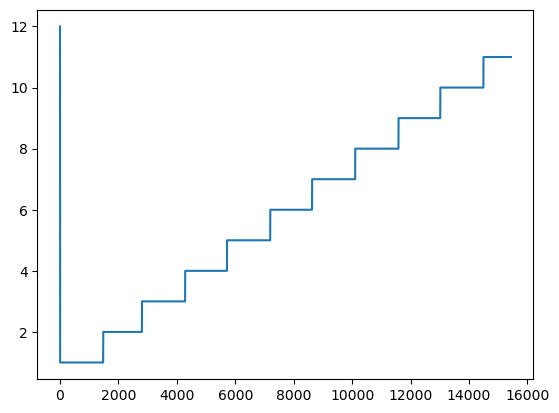

In [11]:
# say we want the month of each measurement
months = values[:,1]
plt.plot(months)

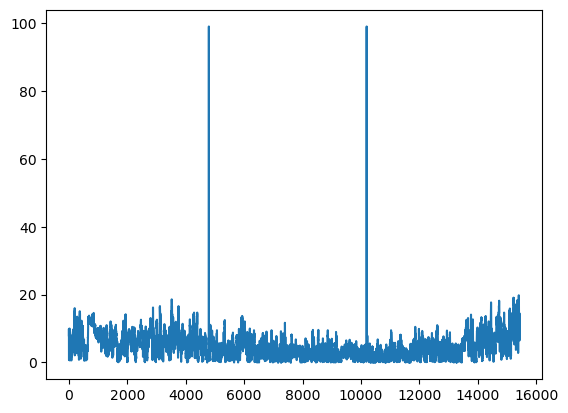

In [12]:
# or we want the wind speed---in the 7th column
wspd=values[:,6]

plt.plot(wspd)

There seem to be some outliers---wave speeds of 99.00.  But this number has just been used as a flag that there's a problem with the data.  Let's mask anything with value 99.

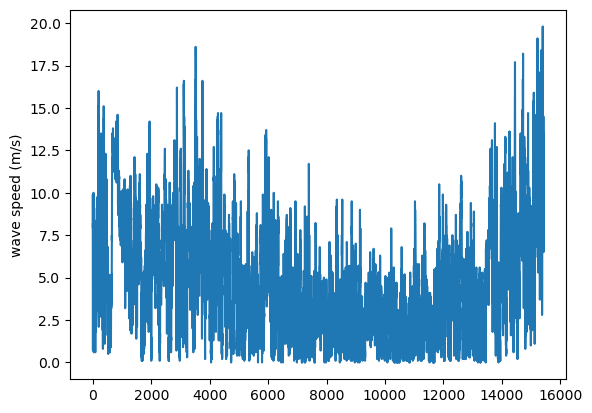

In [13]:
# create a masked array of wavespeeds
# hiding any values that are 99
wspd=np.ma.masked_array(wspd,mask=wspd==99.)

# plot again
plt.plot(wspd)
plt.ylabel('wave speed (m/s)');

When dealing with times, it is often convenient to format each value in an obspy.UTCDateTime object.

In [14]:
# note the years, months, days, hours, and minutes
# obspy expects these to be in integer format, so make them that way
years=values[:,0].astype(int)
months=values[:,1].astype(int)
days=values[:,2].astype(int)
hours=values[:,3].astype(int)
minutes=values[:,4].astype(int)

# create a datetime object for each measurement k
times=[obspy.UTCDateTime(years[k],months[k],days[k],hours[k],minutes[k])
       for k in range(0,values.shape[0])]
times=np.array(times)

print('Here are the times : ',times)

Here are the times :  [UTCDateTime(2008, 12, 31, 23, 50) UTCDateTime(2009, 1, 1, 0, 50)
 UTCDateTime(2009, 1, 1, 1, 20) ... UTCDateTime(2009, 11, 20, 19, 20)
 UTCDateTime(2009, 11, 20, 19, 50) UTCDateTime(2009, 11, 20, 20, 20)]


C:\Users\jhawt\AppData\Local\Temp\ipykernel_12192\2766757784.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(times,wspd,linestyle='-',marker='x',markersize=1);


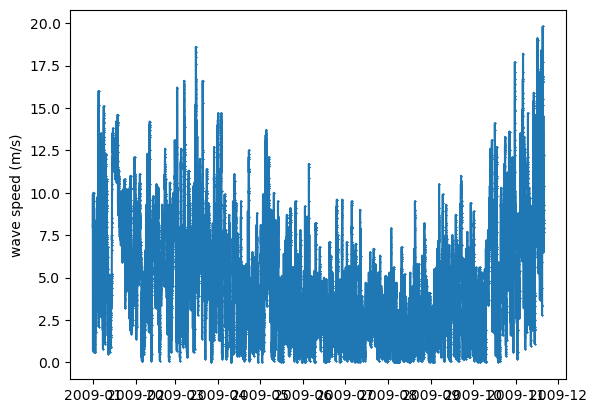

In [18]:
# we can now plot as a function of time
plt.plot_date(times,wspd,linestyle='-',marker='x',markersize=1);
plt.ylabel('wave speed (m/s)');

_Q4: Extract the wave height and plot it as a function of time.  But limit the x-limit to just plot July._

In [16]:
# your code here

_Q5: Plot wave height on one axis and wind speed on the other.  Are the two measurements correlated?_

### 5. _Q6: Compare with seismic amplitude_

You can now compare your observations with seismic shaking.

From the values above, extract 60 or so values of wave height: those made at 2am local time in July and August.

Find a nearby seismic station---one of the borehole stations in the PB network would be ideal.  Compute the seismic amplitude in 10-minute intervals at those same times.  A 1-10 Hz bandpass may work nicely.

Plot the two values against each other.  Do waves influence seismic amplitude?
